<a href="https://colab.research.google.com/github/MartinRusk/Attitude-Indicator/blob/master/VSI_IGBTandDiode6Step_voltage.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><h1><b>Voltage Source Inverter Realized with IGBTs and Diodes: Six-Step Operation</h1></b>

Dr. Bingsen Wang

5/5/2023
</center>

#Python Code
The Python code illustrates the six-step operation of a VSI.

<ipython-input-22-eded19cfaa55>:189: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()
<ipython-input-22-eded19cfaa55>:165: MatplotlibDeprecationWarning: Passing the width parameter of __init__() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  ax.add_patch(mp.Arrow(1.75 - 0.5*iac[k],0.9-k*0.9,
<ipython-input-22-eded19cfaa55>:167: MatplotlibDeprecationWarning: Passing the width parameter of __init__() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  ax.add_patch(mp.Arrow(-1.87+k*1.5 ,1.5+ 0.5*ih[k],
<ipython-input-22-eded19cfaa55>:169: MatplotlibDeprecationWarning: Passing the width parameter of __init__() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  ax.add_patch(mp.Arrow(-1.87+k*1.5 ,-1.5- 0.5*(iac[k]

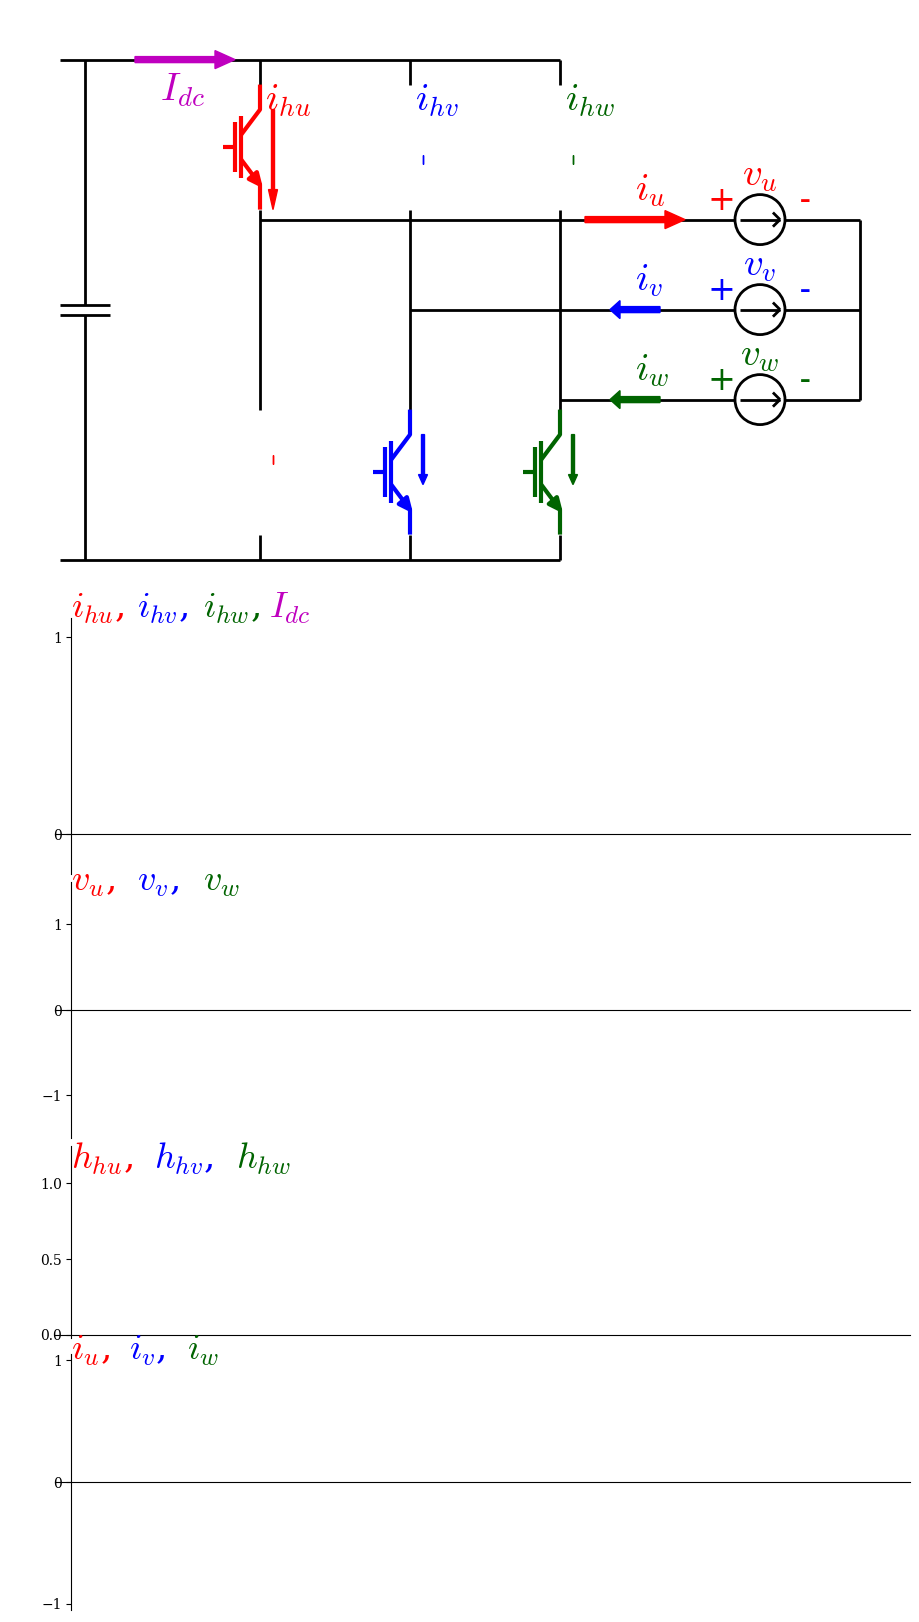

In [ ]:
import matplotlib
from os import linesep
import numpy as np
from numpy import linspace,cos,pi
import matplotlib.pyplot as plt
from matplotlib.colors import to_rgba
from matplotlib.path import Path
import matplotlib.patches as mp
from matplotlib.collections import PatchCollection
from matplotlib import animation,rc,transforms
rc('animation', html='jshtml')
plt.rcParams.update({"font.family" : "serif","mathtext.fontset" : "cm"})

#load currents
def iac(t,Ipk,f):
  iact=[]
  for k in range(3):
    iact.append(Ipk*cos(2*pi*f*t-k*2*pi/3))
  return iact

#modulation functions for high-side switches
def mh(t,M,f,phi):
  mt=[]
  for k in range(3):
    # mt.append(0.5+0.5*M*cos(2*pi*t+phi-k*2*pi/3)) # for averaged model
    mt.append(np.heaviside(cos(2*pi*t+phi-k*2*pi/3),0)) # for 6-step
  return mt

#high-side siwtch currents
def ih(t,Ipk,M,f,phi):
  iht=[]
  for k in range(3):
    iht.append(iac(t,Ipk,f)[k]*mh(t,M,f,phi)[k])
  return iht

#load voltages
def vload(t,vdc,M,f,phi):
  vact=[]
  m0=(mh(t,M,f,phi)[0]+mh(t,M,f,phi)[1]+mh(t,M,f,phi)[2])/3
  for k in range(3):
    vact.append((mh(t,M,f,phi)[k] - m0)*vdc)
  return vact


#draw diode symbol
def drawDiode(ax,x0,y0,h,theta,lw,color):
  p1=mp.PathPatch(Path([(x0,y0),(x0+h*0.25,y0),(x0+h*0.25,y0+h*0.4),
                        (x0+h*0.25,y0+h*0.6),(x0+h*0.25,y0+h),(x0,y0+h)],
                       [Path.MOVETO,Path.LINETO,Path.LINETO,
                        Path.MOVETO,Path.LINETO,Path.LINETO]))
  p2=mp.PathPatch(Path([(x0+h*0.15,y0+h*0.6),(x0+h*0.35,y0+h*0.6)],
                       [Path.MOVETO,Path.LINETO]))
  p3=mp.PathPatch(Path([(x0+h*0.25,y0+h*0.6),(x0+h*0.15,y0+h*0.4),(x0+h*0.35,y0+h*0.4),(x0+h*0.25,y0+h*0.6)],
                       [Path.MOVETO,Path.LINETO,Path.LINETO,Path.CLOSEPOLY]))
  rot=transforms.Affine2D().rotate_deg_around(x0,y0+h*0.75,theta)+ax.transData
  ax.add_collection(PatchCollection([p1,p2,p3],ec=color,fc=['none','none',color],lw=lw,transform=rot))
  return

#draw IGBT symbol
def drawIGBT(ax,x0,y0,h,theta,lw,color):
  p1=mp.PathPatch(Path([(x0,y0),(x0,y0+h*0.2),(x0-h*0.15,y0+h*0.4),
                        (x0-h*0.15,y0+h*0.6),(x0,y0+h*0.8),(x0,y0+h)],
                       [Path.MOVETO,Path.LINETO,Path.LINETO,
                        Path.MOVETO,Path.LINETO,Path.LINETO]))
  p2=mp.PathPatch(Path([(x0-h*0.15,y0+h*0.25),(x0-h*0.15,y0+h*0.75),
                        (x0-h*0.2,y0+h*0.3),(x0-h*0.2,y0+h*0.7),
                        (x0-h*0.3,y0+h*0.5),(x0-h*0.2,y0+h*0.5)],
                       [Path.MOVETO,Path.LINETO,
                        Path.MOVETO,Path.LINETO,
                        Path.MOVETO,Path.LINETO]))
  p3=mp.PathPatch(Path([(x0,y0+h*0.2),(x0-0.025*h,y0+h*0.3),(x0-h*0.09,y0+h*0.245),(x0,y0+h*0.2)],
                       [Path.MOVETO,Path.LINETO,Path.LINETO,Path.CLOSEPOLY]))
  rot=transforms.Affine2D().rotate_deg_around(x0,y0,theta)+ax.transData
  ax.add_collection(PatchCollection([p1,p2,p3],ec=color,fc=['none','none',color],lw=lw,transform=rot))
  return


def drawCurrentSource(ax,x0,y0,d,theta,lw):
  """
  x0,y0: center of the circle
  d: diameter of the circle
  h: hight
  theta: direction of the arrow, 0 for horizontal right
  lw: line width
  """
  ax.add_patch(mp.Circle((x0,y0),d*0.5,lw=lw,ec='k',fc='none'))
  rot=transforms.Affine2D().rotate_deg_around(x0,y0,theta)+ax.transData
  pth1 = mp.PathPatch(Path([(x0-0.4*d,y0),(x0+0.4*d,y0)], 
                           [Path.MOVETO,Path.LINETO]))
  pth2 = mp.PathPatch(Path([(x0+0.4*d,y0),
                            (x0+0.4*d - 0.2*d*cos(pi/4),
                             y0 + 0.2*d*cos(pi/4))], 
                           [Path.MOVETO,Path.LINETO]))
  pth3 = mp.PathPatch(Path([(x0+0.4*d,y0),
                            (x0+0.4*d - 0.2*d*cos(pi/4),
                             y0 - 0.2*d*cos(pi/4))], 
                           [Path.MOVETO,Path.LINETO]))
  pc=PatchCollection([pth1,pth2,pth3],ec='k',lw=lw,transform=rot)
  ax.add_collection(pc)
  return

#draw the VSI without switches, non-animated part
def drawVSIna(ax,lw):
  ax.add_patch(mp.PathPatch(Path([(-4,2.5),
                                  (1,2.5),
                                  (-4,-2.5),
                                  (1,-2.5)],
                                 [Path.MOVETO,
                                  Path.LINETO,
                                  Path.MOVETO,
                                  Path.LINETO]),lw=lw))
  tx_iac=[r'$i_u$',r'$i_v$',r'$i_w$']
  tx_vac1=['+      -','+      -','+      -'] #signs
  tx_vac2=[r'$v_u$',r'$v_v$',r'$v_w$'] #variables
  tx_ih=[r'$i_{hu}$',r'$i_{hv}$',r'$i_{hw}$']
  
  for k in range(3):
    ax.add_patch(mp.PathPatch(Path([(-2+k*1.5,2.5),
                                    (-2+k*1.5,2.25),
                                    (-2+k*1.5,1),
                                    (-2+k*1.5,-1),
                                    (-2+k*1.5,-2.25),
                                    (-2+k*1.5,-2.5)],
                                   [Path.MOVETO,
                                    Path.LINETO,
                                    Path.MOVETO,
                                    Path.LINETO,
                                    Path.MOVETO,
                                    Path.LINETO]),lw=lw))
    ax.add_patch(mp.PathPatch(Path([(-2+k*1.5,0.9-k*0.9),
                                    (2.75,0.9-k*0.9),
                                    (3.25,0.9-k*0.9),
                                    (4,0.9-k*0.9)],
                                   [Path.MOVETO,
                                    Path.LINETO,
                                    Path.MOVETO,
                                    Path.LINETO]),lw=lw))
    drawCurrentSource(ax,3,0.9-k*0.9,0.5,0,lw)
    ax.text(1.75,1.1-k*0.9,tx_iac[k],size=28,color=clst[k])
    ax.text(3,1-k*0.9,tx_vac1[k],size=24,color=clst[k],ha='center')
    ax.text(3,1.25-k*0.9,tx_vac2[k],size=28,color=clst[k],ha='center')
    ax.text(-1.95+k*1.5,2,tx_ih[k],size=28,color=clst[k])
  ax.text(-3,2.1,r'$I_{dc}$',size=28,color='m')
  ax.add_patch(mp.PathPatch(Path([(4,0.9),(4,-0.9)],
                                 [Path.MOVETO,Path.LINETO]),lw=lw))
  ax.add_patch(mp.PathPatch(Path([(-3.75,2.5),(-3.75,0.05),
                                  (-3.75,-0.05),(-3.75,-2.5)],
                                 [Path.MOVETO,Path.LINETO,
                                  Path.MOVETO,Path.LINETO]),lw=lw))
  ax.add_patch(mp.PathPatch(Path([(-4,0.05),(-3.5,0.05),
                                  (-4,-0.05),(-3.5,-0.05)],
                                 [Path.MOVETO,Path.LINETO,
                                  Path.MOVETO,Path.LINETO]),lw=lw))
  return

#draw the animated part of the VSI
def drawVSIanim(ax,mh,iac,ih,idc):
  for k in range(3):
    #IGBT & Diode transparency depends on the current direction and mod function
    drawIGBT(ax,-2+k*1.5,1,1.25,0,3, to_rgba(clst[k],mh[k]*np.heaviside(ih[k],0))) 
    drawDiode(ax,-2+k*1.5,1,1.25,0,3,to_rgba(clst[k],mh[k]*np.heaviside(-ih[k],0)))
    drawIGBT(ax,-2+k*1.5,-2.25,1.25,0,3, to_rgba(clst[k],(1-mh[k])*np.heaviside(-iac[k],0))) 
    drawDiode(ax,-2+k*1.5,-2.25,1.25,0,3,to_rgba(clst[k],(1-mh[k])*np.heaviside( iac[k],0)))
    
    ax.add_patch(mp.Arrow(1.75 - 0.5*iac[k],0.9-k*0.9,
                          iac[k],0,0.3,color=clst[k])) #load current
    ax.add_patch(mp.Arrow(-1.87+k*1.5 ,1.5+ 0.5*ih[k],
                          0,-ih[k],0.15,color=clst[k])) #high side switch
    ax.add_patch(mp.Arrow(-1.87+k*1.5 ,-1.5- 0.5*(iac[k]-ih[k]),
                          0,iac[k]-ih[k],0.15,color=clst[k])) #low side switch
  ax.add_patch(mp.Arrow(-2.75-idc*0.5 ,2.5,idc,0,0.3,color='m'))
  return

fig = plt.figure(figsize=(9,16))
ax1 = fig.add_axes((0,0.625 , 1, 0.375),
                   xlim=[-4.5,4.5], ylim=[-3,3]) # VSI non-animated parts
ax2 = fig.add_axes((0,0.625 , 1, 0.375),
                   xlim=[-4.5,4.5], ylim=[-3,3]) # VSI animated parts
ax3 = fig.add_axes((0.05, 0.46, .95, 0.16), 
                   xlim=[-0.02,1.02], 
                   ylim=[-0.2,1.1]) #switches' currents and dc current
ax6 = fig.add_axes((0.05, 0.295, .95, 0.16), 
                   xlim=[-0.02,1.02], ylim=[-1.5,1.5]) #load voltages
ax4 = fig.add_axes((0.05, 0.17, .95, 0.12), 
                   xlim=[-0.02,1.02], ylim=[-0.02,1.25]) # modulation functions
ax5 = fig.add_axes((0.05, 0.0, .95, 0.16), 
                   xlim=[-0.02,1.02], ylim=[-1.05,1.05]) #load currents

fig.tight_layout()
ax1.axis('off')
ax2.axis('off')
axlst = [ax3,ax4,ax5,ax6]
for k in range(len(axlst)):
  axlst[k].spines[['top','right']].set_visible(False)
  axlst[k].spines[['left','bottom']].set_position(('data', 0))
  axlst[k].set_xticks([]) #remove x-axis ticks
ax3.set_yticks([0,1])
ax4.set_yticks([0,0.5,1])
ax5.set_yticks([-1,0,1])
ax6.set_yticks([-1,0,1])

#parameters
Ipk = 1
Vdc=2
f=1
M=1 #mod index
clst=['r','b','darkgreen']
Nfpp = 360
Nf = Nfpp
t=linspace(0,1/f,Nfpp)

iact = iac(t,Ipk,f) #time domain load currents
phi = 0
vact = vload(t,Vdc,M,f,phi)
mht = mh(t,M,f,phi) #time domain modulation functions for high-side
iht = ih(t,Ipk,M,f,phi) #time domain current thru high-side switches
idct = iht[0] + iht[1] + iht[2] #time domain dc link current

tx_iac=[r'$i_u$,',r'$i_v$,',r'$i_w$']
tx_vac=[r'$v_u$,',r'$v_v$,',r'$v_w$']
tx_mh=[r'$h_{hu}$,',r'$h_{hv}$,',r'$h_{hw}$']
tx_ih=[r'$i_{hu}$,',r'$i_{hv}$,',r'$i_{hw}$,']
lines = [] #array containing all the line segments
for k in range(3):  
  lines.append(ax3.plot([],[],color=clst[k],lw=3)[0]) #switch currents
  lines.append(ax6.plot([],[],color=clst[k],lw=3)[0]) #load voltages
  lines.append(ax4.plot([],[],color=clst[k],lw=3)[0]) #mod func
  lines.append(ax5.plot([],[],color=clst[k],lw=3)[0]) #load currents
  ax3.text(k*0.08,1.1,tx_ih[k],color=clst[k],size=26)
  ax6.text(k*0.08,1.4,tx_vac[k],color=clst[k],size=26)
  ax4.text(k*0.1,1.1,tx_mh[k],color=clst[k],size=26)
  ax5.text(k*0.07,1,tx_iac[k],color=clst[k],size=26)
ax3.text(3*0.08,1.1,r'$I_{dc}$',color='m',size=26)
lines.append(ax3.plot([],[],color='m',lw=5)[0]) #dc link current

# animation function. This is called sequentially
def animate(i):
  for k in range(3): 
    lines[4*k].set_data(t[0:i],iht[k][0:i])
    lines[4*k+1].set_data(t[0:i],vact[k][0:i])
    lines[4*k+2].set_data(t[0:i],mht[k][0:i])
    lines[4*k+3].set_data(t[0:i],iact[k][0:i])
  lines[12].set_data(t[0:i],idct[0:i])
  ax2.clear()
  ax2.set_xlim(-4.5,4.5)
  ax2.set_ylim(-3,3)
  ax2.axis('off')
  drawVSIanim(ax2,[row[i-1] for row in mht],
              [row[i-1] for row in iact],
              [row[i-1] for row in iht],idct[i-1])
  return

drawVSIna(ax1,2)
anim = animation.FuncAnimation(fig, animate, frames=Nf, interval=50)
# anim #uncomment to generate animation in the output area
# to save the animation, uncomment the following three lines
fn = r"VSI_IGBTDiode6step_voltage.mp4" 
writervideo = animation.FFMpegWriter(fps=60) 
anim.save(fn, writer=writervideo,dpi = 120)

#debug
# ax3.set_ylim([-1.1,0.2])
# ax3.set_yticks([-0.75,0])
# for k in range(3):  
#   ax3.plot(t,iact[k],color=clst[k],lw=3)
#   ax4.plot(t,mht[k],color=clst[k],lw=3)
  
  # ax3.plot(t,iht[k],color=clst[k],lw=3)
  # ax3.plot(t,idct,color='c',lw=3)
# ax5.plot(t,idct,'m',lw=4)
# drawVSIanim(ax1,mht[:][1],iact[:][1],iht[:][1],idct[1])
# len(mht)

# drawIGBT(ax1,0,0,1.25,0,2,'b')